In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [ ]:
df1=pd.read_csv('Train_Inpatientdata.csv')
df1.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000.0,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000.0,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000.0,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000.0,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000.0,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2=pd.read_csv('Train.csv')
df2.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
df = pd.merge(df1, df2)
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000.0,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000.0,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000.0,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000.0,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000.0,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14867,BENE65322,CLM77176,2009-11-24,2009-12-08,PRV51052,5000.0,PHY315388,PHY375966,NaN,2009-11-24,...,3004,4019,NaN,4516.0,NaN,NaN,NaN,NaN,NaN,Yes
14868,BENE65406,CLM54890,2009-06-09,2009-06-11,PRV51943,9000.0,PHY409089,NaN,PHY374399,2009-06-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
14869,BENE65508,CLM49980,2009-05-06,2009-05-09,PRV51066,15000.0,PHY330911,PHY414356,NaN,2009-05-06,...,E8798,41400,45981,4562.0,NaN,NaN,NaN,NaN,NaN,No
14870,BENE65531,CLM55892,2009-06-16,2009-06-20,PRV53920,3000.0,PHY375287,NaN,NaN,2009-06-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [ ]:
source = 'Provider'
target = 'AttendingPhysician'

G = nx.from_pandas_edgelist(df, source=source, target = target,create_using=nx.Graph())

In [ ]:
nodes_info_dict = {
  'closeness_centrality': nx.closeness_centrality,
  'eigenvector_centrality': nx.eigenvector_centrality_numpy,
  'pagerank': nx.pagerank
}

columns_with_node_infos = ['degree'] + list(nodes_info_dict.keys())

nodes_info = pd.DataFrame.from_dict(dict(nx.degree(G)), orient='index').rename(columns = {0 : 'degree'}).reset_index()

for info, fun in nodes_info_dict.items():
    temp = pd.DataFrame.from_dict(fun(G), orient='index').rename(columns = {0 : info}).reset_index()
    nodes_info = nodes_info.merge(temp, on='index')
    
nodes_info = nodes_info.rename(columns = {'index': 'Physician'})

df_enriched = df[['Provider','PotentialFraud', 'AttendingPhysician']].merge(nodes_info, left_on = 'Provider',  
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'Provider_'+k for k in columns_with_node_infos}, inplace = True)

df_enriched = df_enriched.merge(nodes_info, left_on = 'AttendingPhysician', 
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'AttendingPhysician_'+k for k in columns_with_node_infos}, inplace = True)


In [ ]:
df_enriched

,Provider,PotentialFraud,AttendingPhysician,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,PRV55912,Yes,PHY390922,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-6.140072e-18,0.000070
1,PRV55912,Yes,PHY349293,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-6.901201e-18,0.000070
2,PRV55912,Yes,PHY334706,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-6.553968e-18,0.000070
3,PRV55912,Yes,PHY390614,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-5.921697e-18,0.000070
4,PRV55912,Yes,PHY380413,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-8.209022e-18,0.000070
...,...,...,...,...,...,...,...,...,...,...,...
14867,PRV51052,Yes,PHY315388,1,0.000126,-2.485793e-18,0.000126,1,0.000126,-1.377151e-18,0.000126
14868,PRV51943,No,PHY409089,1,0.000126,3.227991e-18,0.000126,1,0.000126,-3.722606e-19,0.000126
14869,PRV51066,No,PHY330911,1,0.000126,4.645822e-21,0.000126,1,0.000126,1.968289e-18,0.000126
14870,PRV53920,No,PHY375287,1,0.000126,-1.238670e-19,0.000126,1,0.000126,-5.236785e-20,0.000126


In [ ]:
df_enriched['PotentialFraud']=df_enriched['PotentialFraud'].str.replace('Yes','1')
df_enriched['PotentialFraud']=df_enriched['PotentialFraud'].str.replace('No','0')

In [ ]:
# Provider=df_enriched["Provider"].tolist()
# AttendingPhysician=df_enriched['AttendingPhysician'].tolist()

# source=df_enriched['Provider']
# target=df_enriched['AttendingPhysician']


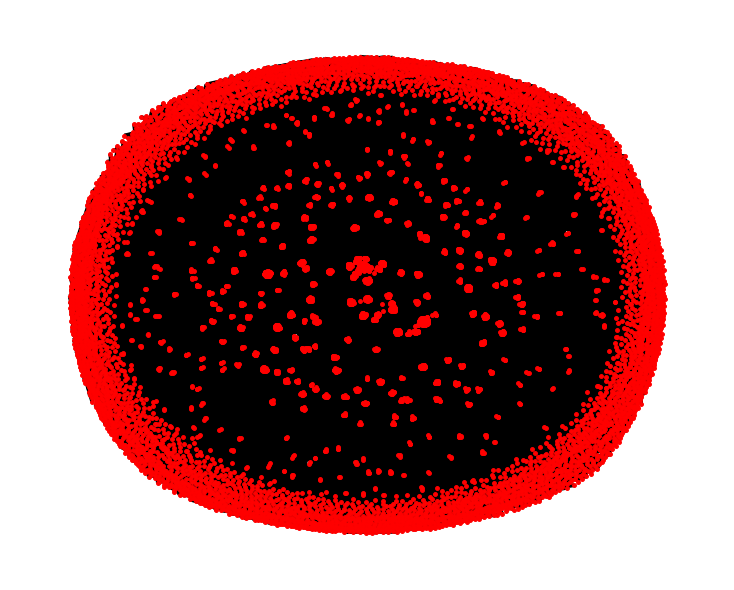

In [ ]:
from matplotlib.pyplot import figure
# weights=df_enriched['PotentialFraud']
source = df_enriched['Provider']
target = df_enriched['AttendingPhysician']
weight = df_enriched['PotentialFraud']
# if 'weight'==1:
#         edge_colors=['red']
# else: 
#         edge_colors=['blue']
edges = pd.DataFrame({'source': source,
                      'target': target,
                      'weight': weight})
G = nx.from_pandas_edgelist(edges, edge_attr='weight')
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
figure(figsize=(10, 8))
nx.draw(G, node_color='r', edge_color=weights,font_weight='bold', width=4,node_size=15, font_size=8, with_labels=False)
# G = nx.from_pandas_edgelist(df_enriched,source='Provider',target ='AttendingPhysician',weight='PotentialFraud',create_using=nx.Graph())
# figure(figsize=(10, 8))
# nx.draw(G, with_labels=False, font_weight='bold', node_size=15, font_size=8)

# Where the nodes in red are the fradulent nodes
# And the ones in black are the no fraude nodes

ValueError: ignored

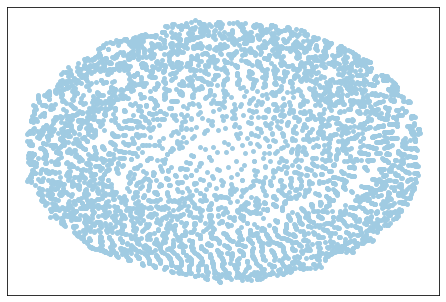

In [ ]:
# G = nx.star_graph(edges)
# pos = nx.spring_layout(G)  # Seed layout for reproducibility
# colors = range(20)
# # figure(figsize=(10, 8))
# nx.draw(G,pos,node_color='#A0CBE2',
#     edge_color=colors,
#     edge_cmap=plt.cm.Blues,font_weight='bold', node_size=15, font_size=8, with_labels=False)
# # nx.draw(G, pos,options,font_weight='bold', node_size=15, font_size=8)
# plt.show()

In [ ]:
nodes = df_enriched.columns.to_list()
nodes = [node.strip() for node in nodes]
nodes

['Provider',
 'PotentialFraud',
 'AttendingPhysician',
 'Provider_degree',
 'Provider_closeness_centrality',
 'Provider_eigenvector_centrality',
 'Provider_pagerank',
 'AttendingPhysician_degree',
 'AttendingPhysician_closeness_centrality',
 'AttendingPhysician_eigenvector_centrality',
 'AttendingPhysician_pagerank']

In [ ]:
pip install nx_altair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import numpy as np
# import nx_altair as nxa
# G= nx.from_pandas_edgelist(df_enriched, source='Provider', target='AttendingPhysician') 
# # Add weights to nodes and edges
# for n in G.nodes():
#     G.nodes[n]['weight'] = np.random.randn()

# for e in G.edges():
#     G.edges[e]['weight'] = np.random.uniform(1, 10)


# # Draw the graph using Altair
# viz = nxa.draw_networkx(
#     G,
#     node_color='weight',
#     cmap='viridis',
#     width='weight',
#     edge_color='black',
# )

# # Show it as an interactive plot!
# viz.interactive()
# import networkx as nx
# import nx_altair as nxa

# pos = nx.spring_layout(G)
# alt.data_transformers.enable('data_server')
# nxa.draw_networkx(G, pos).properties(width=500, height=500)

# # Draw the graph using Altair
# viz = nxa.draw_networkx(G, pos=pos)

# # Show it as an interactive plot!
# viz.interactive()

In [ ]:
pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=e1d75ae9f23bc7849afec06ddb5b87da8d9ba45baa38aa7159345f7e55e449d4
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis


In [ ]:
pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
import networkx as nx
from bokeh.io import output_file, show
from bokeh.plotting import figure, from_networkx

In [ ]:
import networkx as nx

from bokeh.io import output_file, show
from bokeh.plotting import figure, from_networkx

In [ ]:
# import matplotlib
# import matplotlib.pyplot as plt
# from bokeh.plotting import figure, from_networkx
# G = nx.from_pandas_edgelist(df_enriched,source='Provider',target ='AttendingPhysician',create_using=nx.Graph())
# #Establish which categories will appear when hovering over each node
# HOVER_TOOLTIPS = [("PotentialFraud", "@index")]

# #Create a plot — set dimensions, toolbar, and title
# plot = figure(tooltips = HOVER_TOOLTIPS,
#               tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
#             x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1))

# #Create a network graph object with spring layout
# # https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
# graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
# # network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

# #Set node size and color
# graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

# #Set edge opacity and width
# graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

# #Add network graph to the plot
# plt.renderers.append(graph)

# plt.show()

In [ ]:
pos = nx.spring_layout(G)

nxa.draw_networkx(G, pos, node_tooltip='name').properties(width=500, height=500)

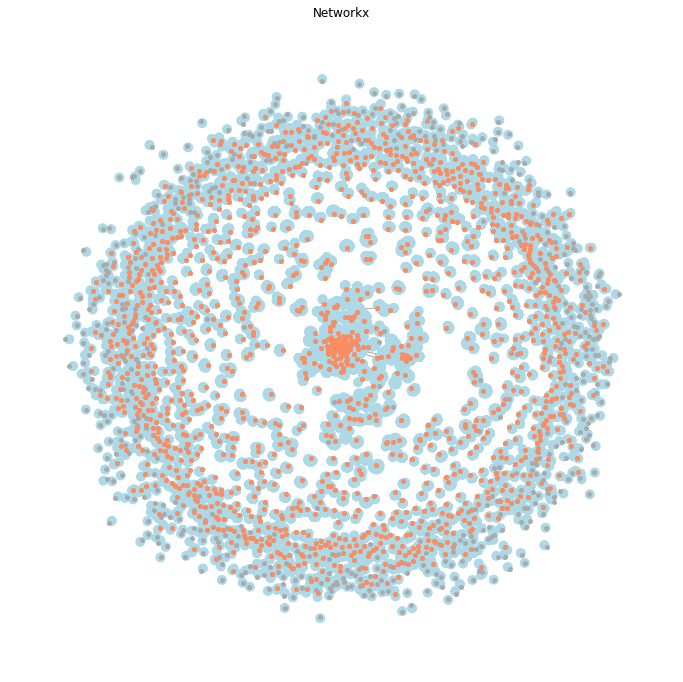

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(df_enriched, source='Provider', target='AttendingPhysician') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

AttendingPhysician = [node for node in g.nodes() if node in df_enriched.AttendingPhysician.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df_enriched.AttendingPhysician.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=AttendingPhysician, node_size=size, node_color='lightblue')

Provider = [node for node in g.nodes() if node in df_enriched.Provider.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=Provider, node_size=15, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in df_enriched.Provider.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=15, node_color='#fc8d62')

AttendingPhysician_dict = dict(zip(AttendingPhysician, AttendingPhysician))
# nx.draw_networkx_labels(g, layout)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Networkx")

# 5. Tell matplotlib to show it
plt.show()

# Prepared a graph using by using node colour and size of the node

In [ ]:
G.nodes()

NodeView(('PRV55912', 'PHY390922', 'PHY349293', 'PHY334706', 'PHY390614', 'PHY380413', 'PHY418191', 'PHY318892', 'PHY319720', 'PHY340849', 'PHY410728', 'PHY414999', 'PHY410835', 'PHY361763', 'PHY333901', 'PHY393882', 'PHY339551', 'PHY354336', 'PHY384397', 'PHY416660', 'PHY403495', 'PHY330172', 'PHY429166', 'PHY320873', 'PHY370861', 'PHY368401', 'PHY387346', 'PHY335210', 'PHY390043', 'PHY399908', 'PHY420794', 'PHY400663', 'PHY382830', 'PHY323689', 'PHY425136', 'PHY431474', 'PHY429928', 'PHY352158', 'PRV55907', 'PHY318495', 'PHY369014', 'PHY328529', 'PHY391371', 'PHY376827', 'PHY346515', 'PHY348866', 'PHY424658', 'PHY426156', 'PHY324847', 'PHY348860', 'PHY329595', 'PHY401871', 'PHY365165', 'PHY415764', 'PHY345209', 'PHY377939', 'PHY373938', 'PHY339058', 'PHY424174', 'PHY351702', 'PHY344050', 'PHY373531', 'PHY397793', 'PHY409279', 'PHY343041', 'PHY406251', 'PHY373044', 'PHY432761', 'PHY375412', 'PHY363806', 'PHY342738', 'PHY337037', 'PHY388919', 'PHY331543', 'PRV56046', 'PHY372395', 'PHY3

In [ ]:
G.edges()

EdgeView([('PRV55912', 'PHY390922'), ('PRV55912', 'PHY349293'), ('PRV55912', 'PHY334706'), ('PRV55912', 'PHY390614'), ('PRV55912', 'PHY380413'), ('PRV55912', 'PHY418191'), ('PRV55912', 'PHY318892'), ('PRV55912', 'PHY319720'), ('PRV55912', 'PHY340849'), ('PRV55912', 'PHY410728'), ('PRV55912', 'PHY414999'), ('PRV55912', 'PHY410835'), ('PRV55912', 'PHY361763'), ('PRV55912', 'PHY333901'), ('PRV55912', 'PHY393882'), ('PRV55912', 'PHY339551'), ('PRV55912', 'PHY354336'), ('PRV55912', 'PHY384397'), ('PRV55912', 'PHY416660'), ('PRV55912', 'PHY403495'), ('PRV55912', 'PHY330172'), ('PRV55912', 'PHY429166'), ('PRV55912', 'PHY320873'), ('PRV55912', 'PHY370861'), ('PRV55912', 'PHY368401'), ('PRV55912', 'PHY387346'), ('PRV55912', 'PHY335210'), ('PRV55912', 'PHY390043'), ('PRV55912', 'PHY399908'), ('PRV55912', 'PHY420794'), ('PRV55912', 'PHY400663'), ('PRV55912', 'PHY382830'), ('PRV55912', 'PHY323689'), ('PRV55912', 'PHY425136'), ('PRV55912', 'PHY431474'), ('PRV55912', 'PHY429928'), ('PRV55912', 'PHY3

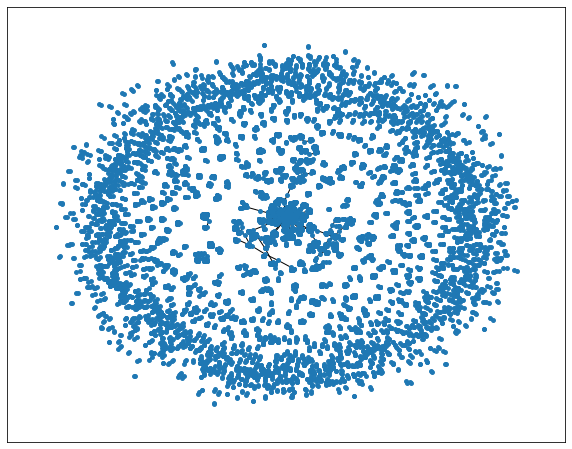

In [ ]:
plt.figure(figsize=(10, 8))
nx.draw_networkx(G,with_labels=False, font_weight='bold', node_size=15, font_size=8)

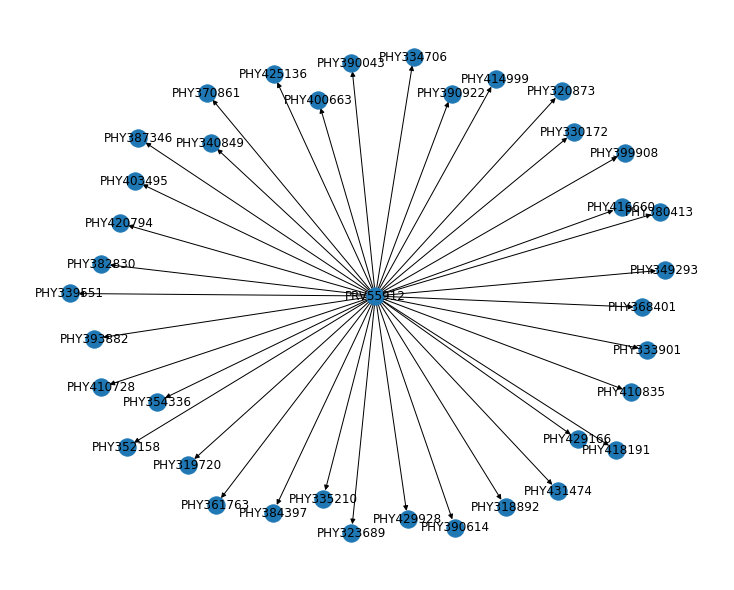

In [ ]:
#Fraudulent
plt.figure(figsize=(10, 8))
c=nx.bfs_tree(G,source='PRV55912')
nx.draw(c,with_labels=True)

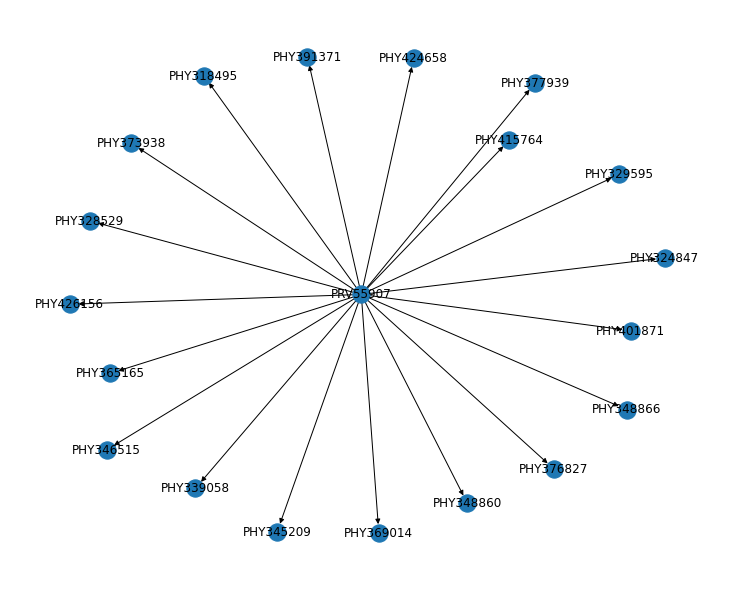

In [ ]:
#Not Fraudulent
plt.figure(figsize=(10, 8))
c=nx.bfs_tree(G,source='PRV55907')
nx.draw(c,with_labels=True)

In [ ]:
pip install igraph

In [ ]:
from igraph import *

G = Graph.DataFrame(df_enriched[[source,target]])
# G = Graph.DataFrame(df[[source,target]], directed=False)
# computing the clustering
communities = G.community_infomap()
                    # G.community_multilevel()
                    # G.community_infomap()
                    # G.community_walktrap()

# summary of the clustering
communities.summary()
# ex: 'Clustering with y elements and n clusters'

# get the cluster of each node
clusters = {n: c for n,c in zip(G.vs["name"], communities.membership)}
figure(figsize=(10, 8))
nx.draw(clusters,with_labels=False, font_weight='bold', node_size=15, font_size=8)

In [ ]:
df_enriched

,Provider,PotentialFraud,AttendingPhysician,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,PRV55912,1,PHY390922,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-6.140072e-18,0.000070
1,PRV55912,1,PHY349293,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-6.901201e-18,0.000070
2,PRV55912,1,PHY334706,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-6.553968e-18,0.000070
3,PRV55912,1,PHY390614,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-5.921697e-18,0.000070
4,PRV55912,1,PHY380413,23,0.002903,-1.267178e-17,0.001410,1,0.001484,-8.209022e-18,0.000070
...,...,...,...,...,...,...,...,...,...,...,...
14867,PRV51052,1,PHY315388,1,0.000126,-2.485793e-18,0.000126,1,0.000126,-1.377151e-18,0.000126
14868,PRV51943,0,PHY409089,1,0.000126,3.227991e-18,0.000126,1,0.000126,-3.722606e-19,0.000126
14869,PRV51066,0,PHY330911,1,0.000126,4.645822e-21,0.000126,1,0.000126,1.968289e-18,0.000126
14870,PRV53920,0,PHY375287,1,0.000126,-1.238670e-19,0.000126,1,0.000126,-5.236785e-20,0.000126


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [ ]:
A = list(df_enriched["Provider"].unique())
A = list(df_enriched["AttendingPhysician"].unique())
G = nx.Graph()
for i in node_list:
    G.add_node(i)

In [ ]:
for i,j in df_enriched.iterrows():
    G.add_edges_from([(j["Provider"],j["AttendingPhysician"])])

In [ ]:
G.nodes()

NodeView((nan, 'PHY323122', 'PRV53317', 'PHY363865', 'PHY386849', 'PHY402314', 'PRV55826', 'PRV51233', 'PRV56435', 'PHY360276', 'PHY364844', 'PRV51078', 'PHY422981', 'PRV55205', 'PHY337065', 'PHY351605', 'PHY337483', 'PHY321410', 'PRV57129', 'PHY412581', 'PHY411218', 'PHY408738', 'PHY365016', 'PHY318827', 'PHY413009', 'PHY354835', 'PHY377015', 'PHY416755', 'PRV55385', 'PHY343862', 'PHY429176', 'PHY349321', 'PRV52898', 'PHY315859', 'PHY353771', 'PRV55676', 'PHY355734', 'PHY330372', 'PHY422948', 'PHY409505', 'PHY356016', 'PHY369659', 'PHY411034', 'PHY427773', 'PHY429804', 'PRV55158', 'PHY380719', 'PHY347493', 'PHY343379', 'PHY341322', 'PHY322503', 'PHY361914', 'PHY371843', 'PHY330172', 'PHY329988', 'PHY338939', 'PHY365510', 'PHY368701', 'PHY407380', 'PRV56031', 'PHY346221', 'PHY329784', 'PRV52378', 'PHY383115', 'PHY406880', 'PRV51077', 'PHY359829', 'PRV51393', 'PRV54925', 'PHY380568', 'PHY390947', 'PHY346751', 'PHY347725', 'PHY339200', 'PHY340062', 'PHY361327', 'PHY405068', 'PHY320307', 

In [ ]:
pos = nx.spring_layout(G, k=0.5, iterations=50)

In [ ]:
for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [ ]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [ ]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [ ]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [ ]:
pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=89015544849fe2384fa4315aa0be0fb50c667a29c83c3c891573f1d572c3f5db
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from plotly.offline import iplot
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. of connections",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

# Create an interactive graph using plotty.